<a href="https://colab.research.google.com/github/LabdhiSheth/Deep-Learning-lab-work/blob/main/Mnist_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 18BCE101 Labdhi Sheth
Deep Learning practical

Aim:
MNIST classification dataset using CNN.

The MNIST dataset is a large database of handwritten digits. This dataset is used for training models to recognize handwritten digits.


In [ ]:
#importing necessary libraries
from tensorflow import keras
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout,Flatten
from keras.models import Sequential
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn import metrics
import numpy
from matplotlib import pyplot as plt

### MNIST using CNN

Loading the dataset

In [ ]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

print(type(X_train))
print("X train",X_train.shape)
print("X test",X_test.shape)
print("y train",y_train.shape)
print("y test",y_test.shape)

<class 'numpy.ndarray'>
X train (60000, 28, 28)
X test (10000, 28, 28)
y train (60000,)
y test (10000,)


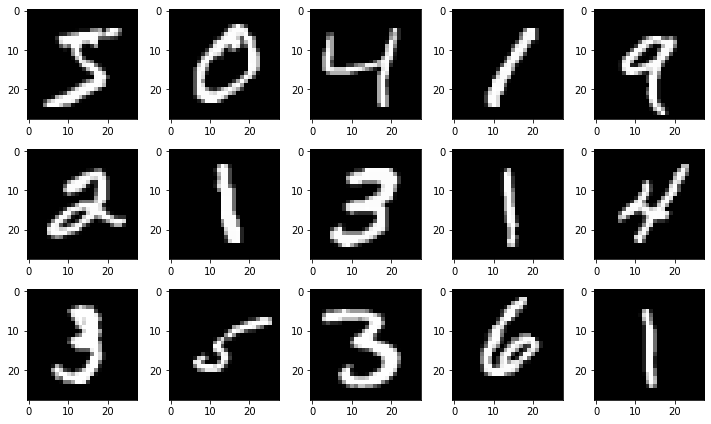

In [ ]:
row = 3
col = 5

num = row*col
images = X_train[:num]
labels = X_test[:num]

fig, axes = plt.subplots(row, col, figsize=(2*col,2*row))
for i in range(row*col):
    ax = axes[i//col, i%col]
    ax.imshow(images[i], cmap='gray')
plt.tight_layout()
plt.show()

Reshaping as [samples][width][height][channels]

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1).astype('float32')

print("X train",X_train.shape)
print("X test",X_test.shape)

X train (60000, 28, 28, 1)
X test (10000, 28, 28, 1)


normalizing the inputs to 0-1

In [ ]:
X_train = X_train/255
X_test = X_test/255

one hot encoding

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test_copy = y_test                        #for future use
y_test = np_utils.to_categorical(y_test)
print("y train",y_train.shape)
print("y test",y_test.shape)

y train (60000, 10)
y test (10000, 10)


Building the model

In [ ]:
model = Sequential()
model.add(Conv2D(32,(5,5), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(y_test.shape[1], activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 20, batch_size = 100, verbose = 1)

Epoch 1/20
600/600 [==============================] - 33s 55ms/step - loss: 0.3945 - accuracy: 0.8837 - val_loss: 0.0616 - val_accuracy: 0.9816
Epoch 2/20
600/600 [==============================] - 34s 56ms/step - loss: 0.0702 - accuracy: 0.9783 - val_loss: 0.0429 - val_accuracy: 0.9855
Epoch 3/20
600/600 [==============================] - 33s 56ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0367 - val_accuracy: 0.9873
Epoch 4/20
600/600 [==============================] - 34s 56ms/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0352 - val_accuracy: 0.9881
Epoch 5/20
600/600 [==============================] - 34s 56ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0377 - val_accuracy: 0.9872
Epoch 6/20
600/600 [==============================] - 34s 56ms/step - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.0362 - val_accuracy: 0.9886
Epoch 7/20
600/600 [==============================] - 35s 58ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0316 - val_accuracy:

In [ ]:
prediction = model.predict(X_test)
prediction = numpy.argmax(prediction, axis = 1)

In [ ]:
print("accuracy score for the MNIST classification of the dataset is :",metrics.accuracy_score(y_test_copy, prediction, normalize = True))
print(metrics.classification_report(y_test_copy, prediction))
print(metrics.confusion_matrix(y_test_copy, prediction))

accuracy score for the MNIST classification of the dataset is : 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    1    0    1    0    0    1    0    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    1 1023    1    0    0    0    5    1    0]
 [   0    0  